# Python Basics for Machine Learning **Regression**


## Authors:
- Alan Song
- DeLi Zhang


# Table of Contents
1. Installing packages ``scipy``, ``sci-kit learn``
2. simple regression demo: Lennard-jones potential
- least squares fitting with ``scipy`` if we know the equation
- Three ML models with ``sci-kit learn`` to fit the data
3. Advanced regression demo: Potential Energy Surface of Methane
- data processing
- fitting with hyper-parameter fine tuning
- result discussion

Uncomment the necessary lines below if your environment is missing

In [3]:
# !pip install -U scikit-learn

# Simple regression demo: 
# Lennard Jones Potential $U_{Lj}(R) = 4\epsilon[(\frac{\sigma}{R})^{12}-(\frac{\sigma}{R})^{6}]$

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
sigma = 0.21
epislon = 1

def Lj(r, sigma, epislon):
    s_r = sigma/r
    return 4*epislon * (s_r**12 - s_r**6)

x = np.arange(0.2, 0.5, 0.005)
y = Lj(x, sigma, epislon)

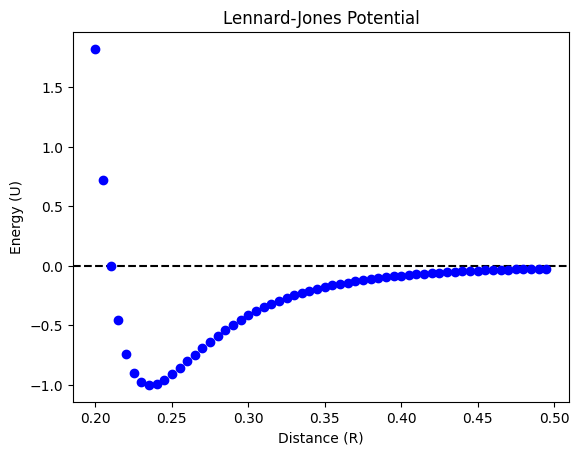

In [6]:
def plot_lj(x, y):
    plt.figure(dpi=100)

    plt.axhline(0, c='k', linestyle='--', zorder=1)
    plt.scatter(x, y, c='b', zorder=2)

    plt.title("Lennard-Jones Potential")
    plt.ylabel("Energy (U)")
    plt.xlabel("Distance (R)")

    plt.show()

plot_lj(x, y)

In [7]:
# x = np.arange(0.2, 0.4, 0.002)
# y = Lj(x, sigma, epislon) + np.random.rand(len(x)) * 0.1
# lj_dict = {'R':x, 'U_Lj':y}
# pd.DataFrame(lj_dict).to_csv('Lennard-jones.csv')

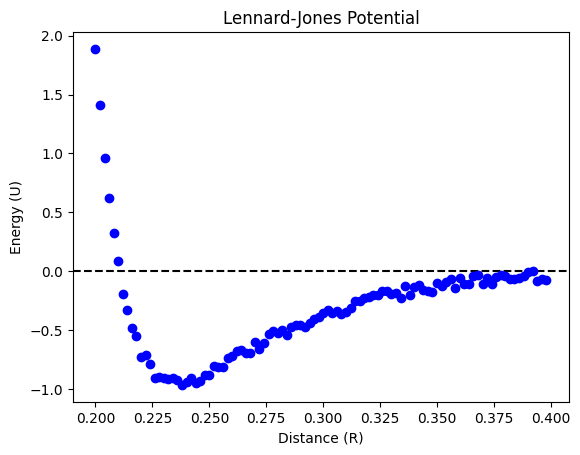

In [8]:
data = pd.read_csv('Lennard-jones.csv',usecols=[1, 2])
plot_lj(data.R, data.U_Lj)

# Regression 1: suppose we know the exact analytical expression of data

### scipy.optimize.curve_fit function, Use non-linear least squares to fit a function, f, to data.
### REFERENCE: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve%5Ffit.html

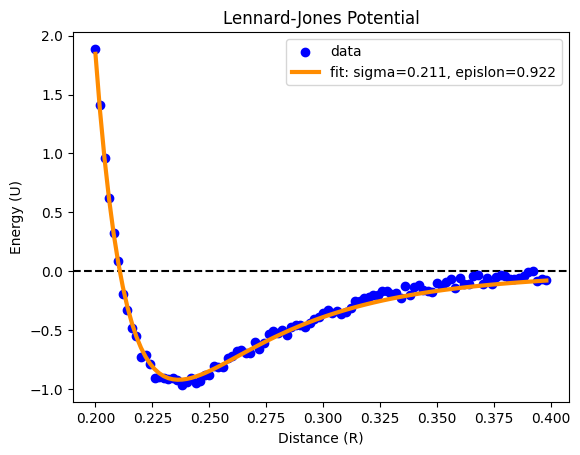

In [9]:

from scipy.optimize import curve_fit

xdata=data.R.to_numpy()
ydata = data.U_Lj.to_numpy()

popt, pcov = curve_fit(Lj, xdata, ydata)

plt.figure(dpi=100)

plt.axhline(0, c='k', linestyle='--', zorder=1)
plt.scatter(xdata, ydata, c='b', zorder=2, label='data')
plt.plot(xdata, Lj(xdata, *popt), 'darkorange', linewidth =3.0, label='fit: sigma=%5.3f, epislon=%5.3f' % tuple(popt))
plt.legend()

plt.title("Lennard-Jones Potential")
plt.ylabel("Energy (U)")
plt.xlabel("Distance (R)")

plt.show()



# Regression 2: suppose we DON'T know the exact analytical expression of data


### ``sci-kit learn`` is a Python package that faciliates the implementation of several machine learning models for dimensionality reduction, clustering, classification, regression, and more.
### REFERENCE: https://scikit-learn.org/stable/index.html

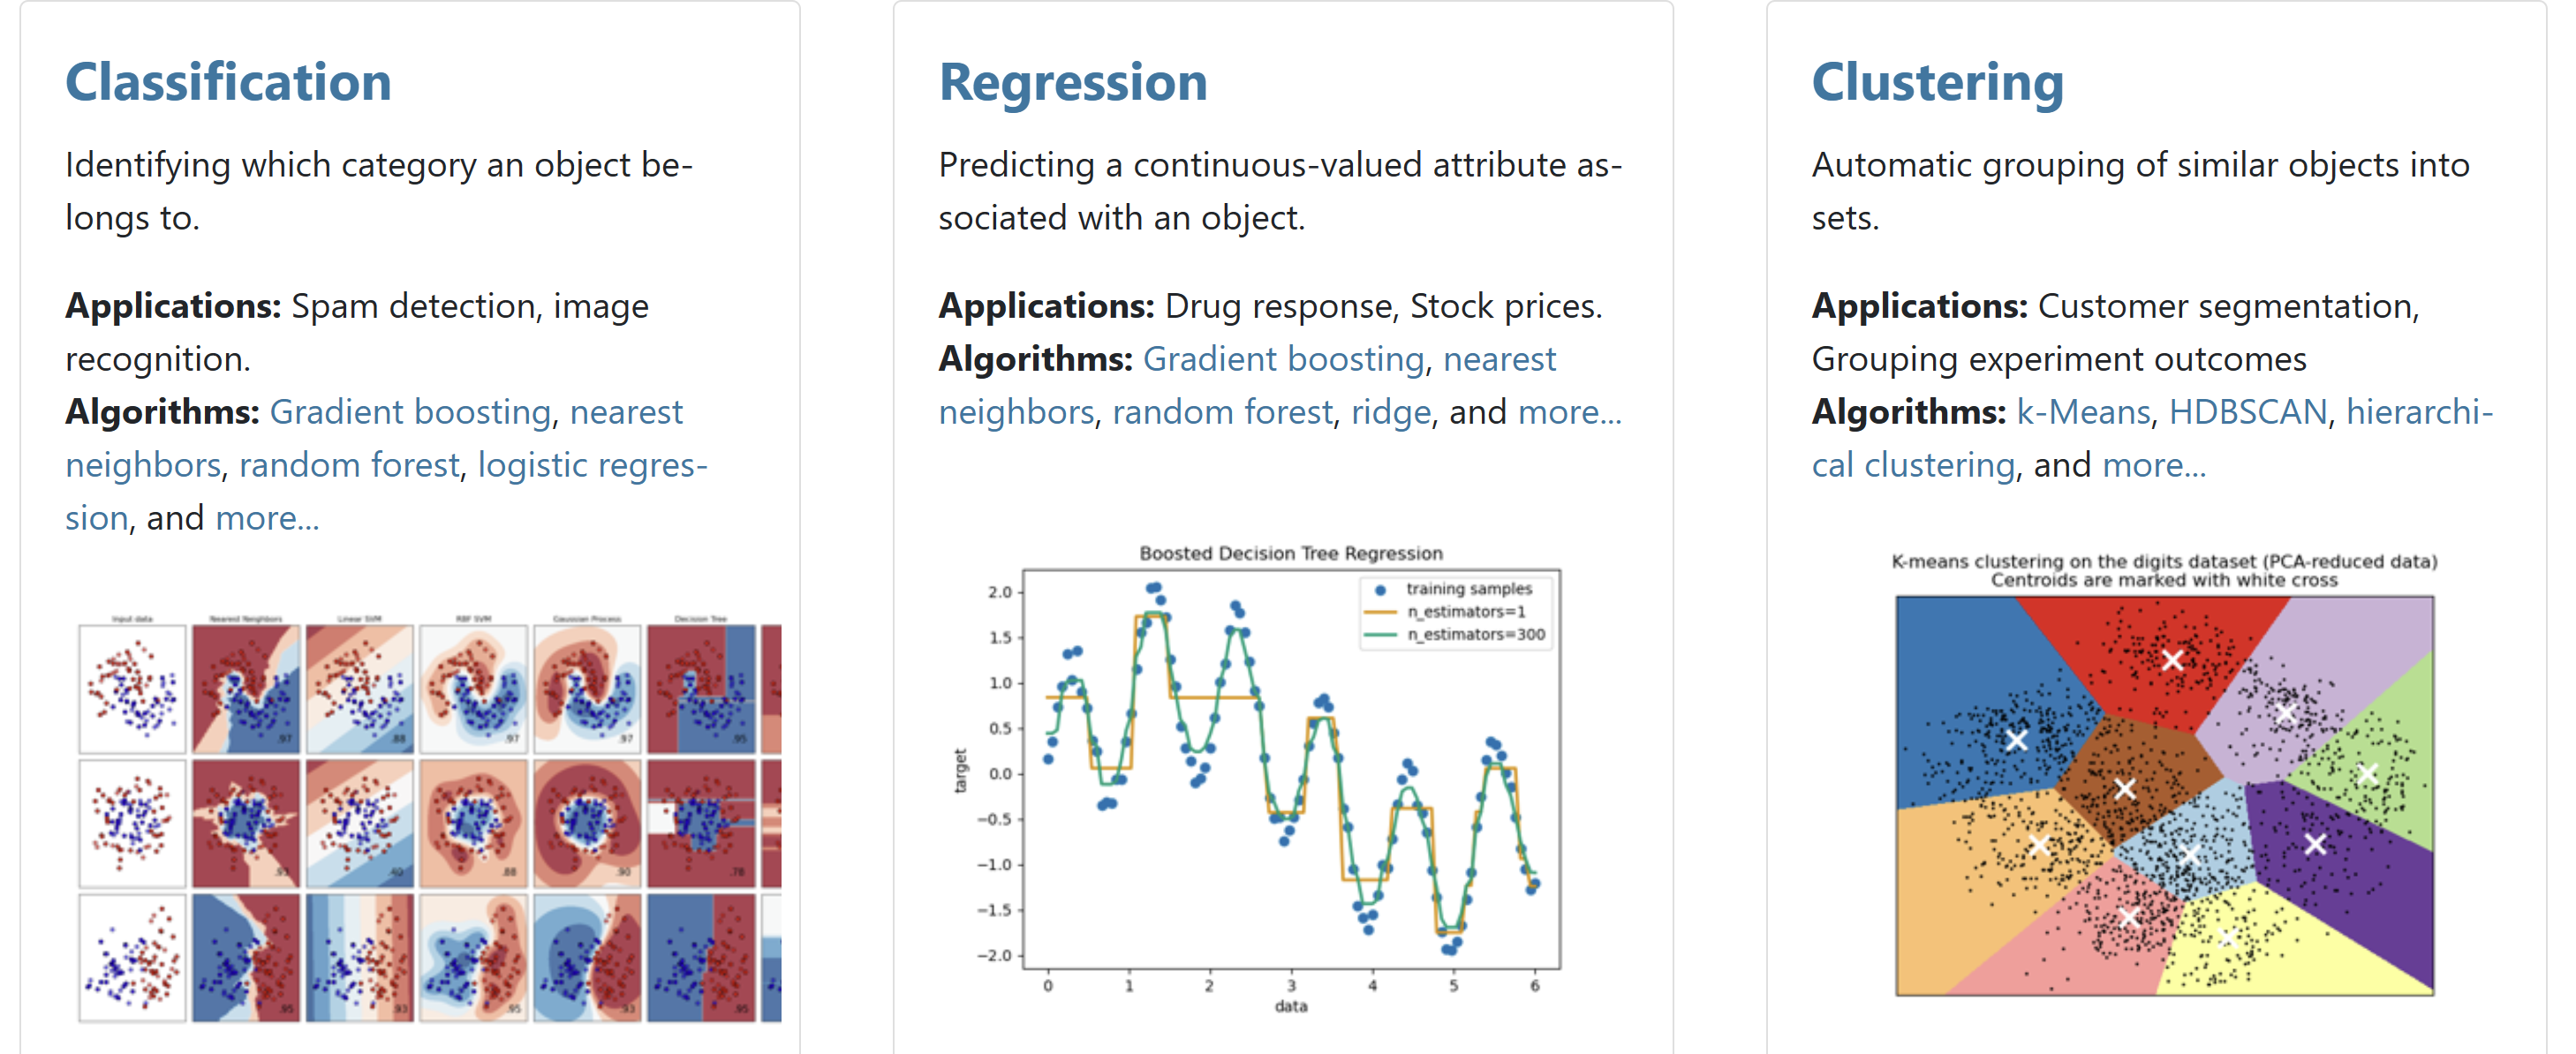

[LibSVM]*
optimization finished, #iter = 38
obj = -6.158907, rho = 0.012162
nSV = 18, nBSV = 15


/home/alan/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.3, 0.5, 'RMSE = 0.05492 eV')

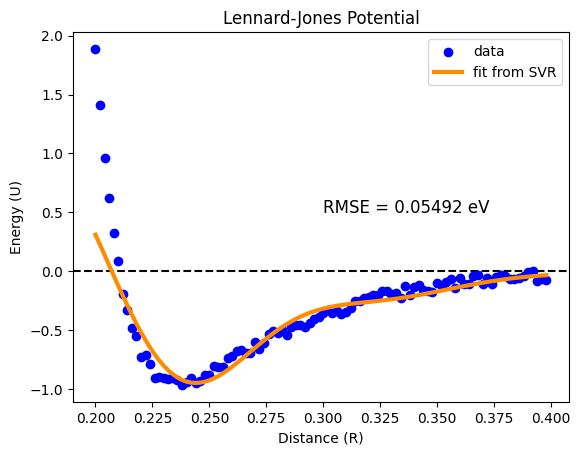

In [10]:
from sklearn import svm
from sklearn.metrics import mean_squared_error


predictor = svm.SVR(gamma='scale', C=1, kernel='rbf', tol=1e-3, verbose=True)

predictor.fit(xdata.reshape(-1, 1), ydata.reshape(-1, 1))

x_predict = xdata.reshape(-1, 1)
ypredict = predictor.predict(x_predict)

# plotting 
plt.figure(dpi=100)

plt.axhline(0, c='k', linestyle='--', zorder=1)
plt.scatter(xdata, ydata, c='b', zorder=2, label='data')
plt.plot(x_predict, ypredict, 'darkorange', linewidth =3.0, label='fit from SVR')
plt.legend()

plt.title("Lennard-Jones Potential")
plt.ylabel("Energy (U)")
plt.xlabel("Distance (R)")
plt.text(0.3, 0.5, 'RMSE = {:.5f} eV'.format(mean_squared_error(ydata, ypredict)), fontsize=12)


Text(0.3, 0.5, 'RMSE = 0.00000 eV')

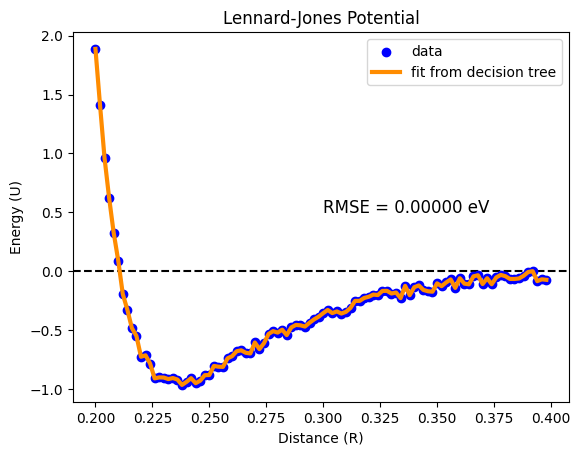

In [16]:
from sklearn.tree import DecisionTreeRegressor

predictor = DecisionTreeRegressor(random_state=42)
predictor.fit(xdata.reshape(-1, 1), ydata.reshape(-1, 1))

x_predict = xdata.reshape(-1, 1)
ypredict = predictor.predict(x_predict)

# plotting 
plt.figure(dpi=100)

plt.axhline(0, c='k', linestyle='--', zorder=1)
plt.scatter(xdata, ydata, c='b', zorder=2, label='data')
plt.plot(x_predict, ypredict, 'darkorange', linewidth =3.0, label='fit from decision tree')
plt.legend()

plt.title("Lennard-Jones Potential")
plt.ylabel("Energy (U)")
plt.xlabel("Distance (R)")
plt.text(0.3, 0.5, 'RMSE = {:.5f} eV'.format(mean_squared_error(ydata, ypredict)), fontsize=12)


/home/alan/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1921     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00681D-01    |proj g|=  4.45924D-01

At iterate    1    f=  1.01764D-01    |proj g|=  7.20355D-03

At iterate    2    f=  1.01655D-01    |proj g|=  5.39732D-03

At iterate    3    f=  1.01507D-01    |proj g|=  7.11907D-03

At iterate    4    f=  1.01349D-01    |proj g|=  6.31190D-03

At iterate    5    f=  1.01161D-01    |proj g|=  4.93168D-03

At iterate    6    f=  9.96776D-02    |proj g|=  1.80959D-02

At iterate    7    f=  9.59372D-02    |proj g|=  3.14284D-02

At iterate    8    f=  9.54794D-02    |proj g|=  8.25196D-03

At iterate    9    f=  9.54207D-02    |proj g|=  4.42387D-03

At iterate   10    f=  9.53862D-02    |proj g|=  4.48110D-03

At iterate   11    f=  9.53767D-02    |proj g|=  8.65561D-03

At iterate   12    f=  9.53436D-02    |proj g|=  3.38343D-03

At iterate   13    f=  9.5

/home/alan/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0.3, 0.5, 'RMSE = 0.00078 eV')

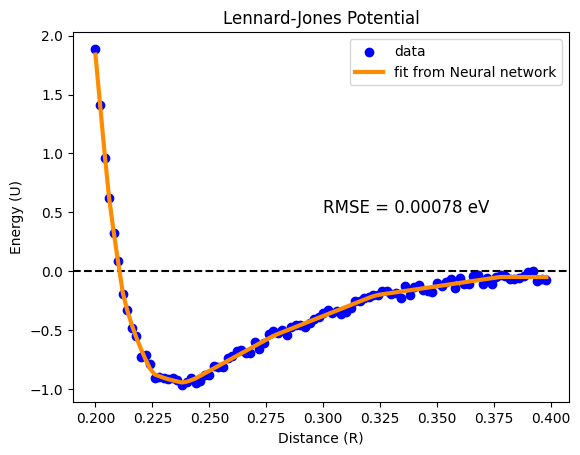

In [14]:
from sklearn.neural_network import MLPRegressor

predictor = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(640), max_iter=1000, tol=1e-5, alpha=1e-3, verbose=True, warm_start=True, random_state=42)
predictor.fit(xdata.reshape(-1, 1), ydata.reshape(-1, 1))

x_predict = xdata.reshape(-1, 1)
ypredict = predictor.predict(x_predict)

# plotting 
plt.figure(dpi=100)

plt.axhline(0, c='k', linestyle='--', zorder=1)
plt.scatter(xdata, ydata, c='b', zorder=2, label='data')
plt.plot(x_predict, ypredict, 'darkorange', linewidth =3.0, label='fit from Neural network')
plt.legend()

plt.title("Lennard-Jones Potential")
plt.ylabel("Energy (U)")
plt.xlabel("Distance (R)")
plt.text(0.3, 0.5, 'RMSE = {:.5f} eV'.format(mean_squared_error(ydata, ypredict)), fontsize=12)

# Advanced regression demo: 
# Potential Energy Surface (PES) of methane

In [15]:
import pandas as pd

PESdata = pd.read_csv('PES.csv',usecols=[0, 1, 2])
PESdata

x        y        energy
0     0.99655  0.57418 -2.390000e-07
1     0.99655  0.59468 -4.300000e-07
2     0.99655  0.61519 -7.470000e-07
3     0.99655  0.63569 -1.250000e-06
4     0.99655  0.65620 -2.030000e-06
...       ...      ...           ...
9995  3.63962  2.52228 -2.040000e-08
9996  3.63962  2.54278 -1.070000e-08
9997  3.63962  2.56329 -5.400000e-09
9998  3.63962  2.58379 -2.700000e-09
9999  3.63962  2.60430 -1.200000e-09

[10000 rows x 3 columns]

Text(0.5, 0, 'x direction')

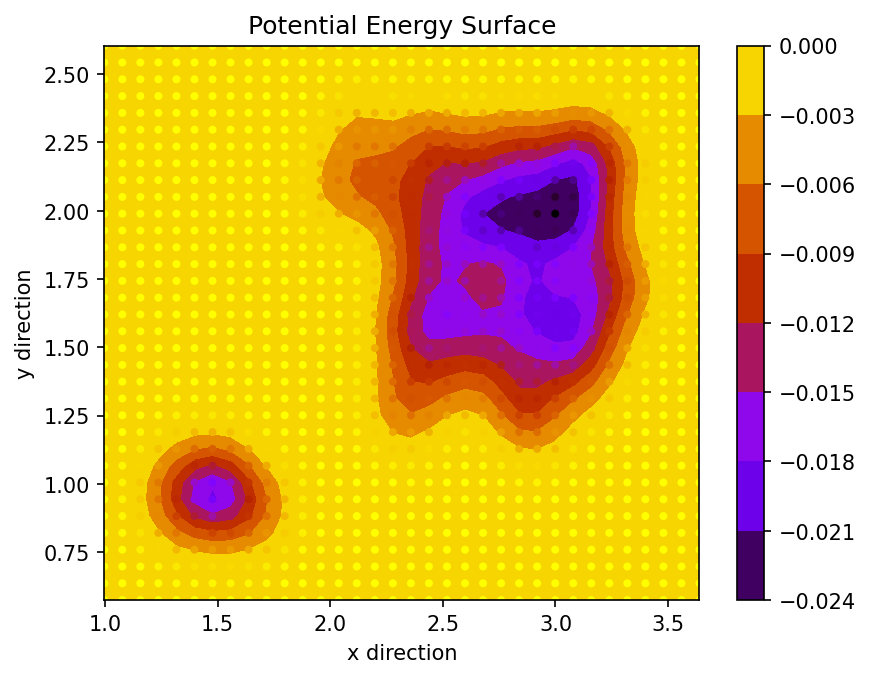

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# just plot the dataset first
plt.figure(dpi=150)
ax = plt.subplot()
X_train = PESdata.x.to_numpy().reshape(-1, 100)[::3,::3]
Y_train = PESdata.y.to_numpy().reshape(-1, 100)[::3,::3]
Z_train = PESdata.energy.to_numpy().reshape(-1, 100)[::3,::3]

# Plot the training points
ax.scatter(X_train, Y_train, c=Z_train, cmap='gnuplot', s=8, zorder=2)
plt.contourf(X_train, Y_train, Z_train, cmap='gnuplot', zorder=1)
plt.colorbar()

plt.title("Potential Energy Surface")
plt.ylabel("y direction")
plt.xlabel("x direction")

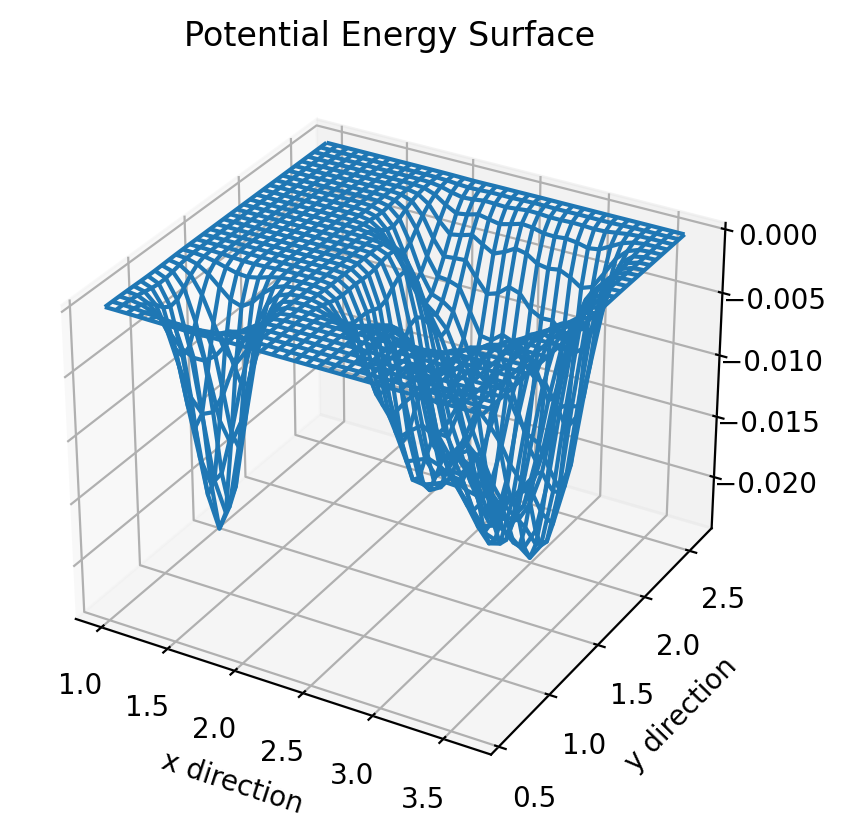

In [17]:
import matplotlib
# matplotlib.use("WebAgg")

fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')

# ax.scatter(X_train, Y_train, Z_train, c=Z_train, zdir='z', s=15, cmap='gnuplot', depthshade=True)
ax.plot_wireframe(X_train, Y_train, Z_train, cmap='gnuplot', rstride=1, cstride=1)
plt.title("Potential Energy Surface")
plt.ylabel("y direction")
plt.xlabel("x direction")
plt.show()


# Now we turn to fitting this PES with Neural Network

## **data processing**: data structure and Scaler

## MinMax Scalar: $ \frac{x_i - min(x)}{max(x) - min(x)}$ , Standard Scaler: $ \frac{x_i - mean(x)}{std(x)}$

In [18]:
from sklearn.preprocessing import MinMaxScaler

train_input = np.concatenate([X_train.reshape(-1, 1), Y_train.reshape(-1, 1)], axis=1)

scaler = MinMaxScaler()
scaler = scaler.fit(Z_train.reshape(-1, 1)) 
train_target = scaler.transform(Z_train.reshape(-1, 1))

print(train_input)

[[0.99655 0.57418]
 [0.99655 0.63569]
 [0.99655 0.69721]
 ...
 [3.63962 2.48126]
 [3.63962 2.54278]
 [3.63962 2.6043 ]]


## **training**: start training with MLPRegressor, you are free to tune the hyper-parameters

In [19]:
from sklearn.neural_network import MLPRegressor

predictor = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(640), learning_rate_init=0.01, max_iter=5000, tol=1e-9, alpha=1e-5, warm_start=True, verbose=True, random_state=42)
predictor.fit(train_input, train_target)

predict_input = train_input
predict_output = predictor.predict(predict_input)
predict_output = scaler.inverse_transform(predict_output.reshape(-1, 1))

/home/alan/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2561     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65082D-01    |proj g|=  8.18176D-01

At iterate    1    f=  5.78630D-02    |proj g|=  4.80826D-02

At iterate    2    f=  5.25109D-02    |proj g|=  6.34977D-02

At iterate    3    f=  3.79717D-02    |proj g|=  6.45954D-02

At iterate    4    f=  3.11382D-02    |proj g|=  2.60923D-02

At iterate    5    f=  2.59887D-02    |proj g|=  2.38223D-02

At iterate    6    f=  2.40771D-02    |proj g|=  1.26234D-02

At iterate    7    f=  2.32446D-02    |proj g|=  5.45104D-03

At iterate    8    f=  2.31361D-02    |proj g|=  5.13075D-03

At iterate    9    f=  2.23300D-02    |proj g|=  1.86037D-02

At iterate   10    f=  2.20801D-02    |proj g|=  6.14438D-03

At iterate   11    f=  2.20294D-02    |proj g|=  5.42257D-03

At iterate   12    f=  2.18466D-02    |proj g|=  3.82123D-03

At iterate   13    f=  2.1

## **Result analysis**

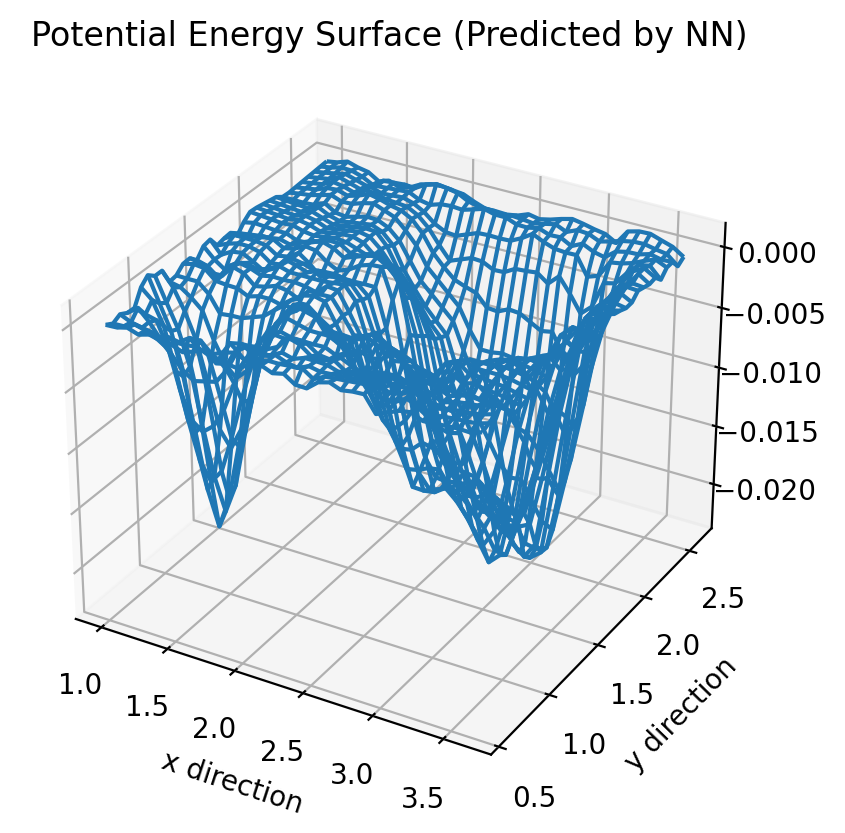

In [20]:
import matplotlib
# matplotlib.use("WebAgg")

# plotting 
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(X_train, Y_train, predict_output.reshape(34, 34), cmap='gnuplot', rstride=1, cstride=1)
plt.title("Potential Energy Surface (Predicted by NN)")
plt.ylabel("y direction")
plt.xlabel("x direction")
plt.show()

Text(0.5, 0, 'Predicted values')

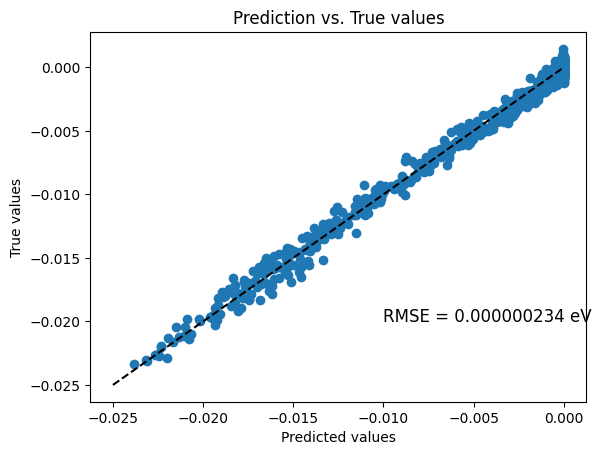

In [21]:
from sklearn.metrics import mean_squared_error

fig = plt.figure(dpi=100)
plt.scatter(Z_train.reshape(-1, 1), predict_output.reshape(-1, 1))
plt.text(-0.01, -0.02, 'RMSE = {:.9f} eV'.format(mean_squared_error(Z_train.reshape(-1, 1), predict_output.reshape(-1, 1))), fontsize=12)

plt.plot(np.array([-0.025, 0]), np.array([-0.025, 0]), 'k--')
plt.title("Prediction vs. True values")
plt.ylabel("True values")
plt.xlabel("Predicted values")